In [74]:
import numpy as np 
import pandas as pd 

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import np_utils
import itertools
import numpy as np
import seaborn as sns
sns.set_style('ticks') 

In [76]:
df = pd.read_csv("Skyserver_12_30_2019 4_49_58 PM.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [77]:
df.shape

(100000, 18)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100000 non-null  int64  
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  int64  
 9   rerun      100000 non-null  int64  
 10  camcol     100000 non-null  int64  
 11  field      100000 non-null  int64  
 12  specobjid  100000 non-null  uint64 
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  int64  
 16  mjd        100000 non-null  int64  
 17  fiberid    100000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 13.7+

In [79]:
df_new = df.iloc[:, 3:8]      # 读取所有行，读取3到7列
df_new['redshift'] = df['redshift']   # 载入df的'redshift'列
df_new['class'] = df['class']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         100000 non-null  float64
 1   g         100000 non-null  float64
 2   r         100000 non-null  float64
 3   i         100000 non-null  float64
 4   z         100000 non-null  float64
 5   redshift  100000 non-null  float64
 6   class     100000 non-null  object 
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


In [80]:
df_new.head()

,u,g,r,i,z,redshift,class
0,18.69254,17.13867,16.55555,16.34662,16.17639,0.000115,STAR
1,18.47633,17.30546,17.24116,17.32780,17.37114,-0.000093,STAR
2,16.47714,15.31072,15.55971,15.72207,15.82471,0.000165,STAR
3,18.63561,16.88346,16.09825,15.70987,15.43491,0.058155,GALAXY
4,18.88325,17.87948,17.47037,17.17441,17.05235,0.072210,GALAXY


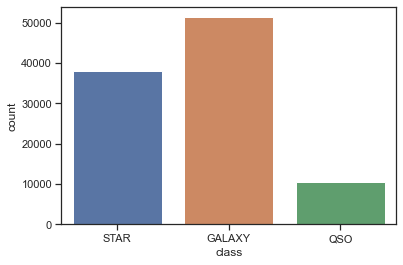

In [81]:
sns.countplot(x= 'class', data = df_new)
plt.show()

## 重采样

In [82]:
# Resampling
star = df_new[df_new['class'] == 'STAR']  # 取出df_new的'class'列中，所有值为'STAR'的条目
galaxy = df_new[df_new['class'] == 'GALAXY']
qso = df_new[df_new['class'] == 'QSO']

In [83]:
print(star.shape, galaxy.shape, qso.shape)

(38096, 7) (51323, 7) (10581, 7)


In [84]:
qso['class'].count()

10581

###  重采样恒星/星系数目至类星体数目（类星体数目少）

In [85]:
star = star.sample(qso['class'].count())  # qso['class'].count() 类星体class列条目数，选择恒星中所有class条目
galaxy = galaxy.sample(qso['class'].count())

In [86]:
df_resampling = pd.concat([star, galaxy, qso], axis = 0)  # pd.concat()函数可以沿着指定的轴将多个dataframe或者series拼接到一起，
df_resampling.head()

,u,g,r,i,z,redshift,class
10671,18.14450,16.68137,16.07937,15.83826,15.71648,-0.000006,STAR
32605,19.34202,18.01103,17.48282,17.24587,17.18104,-0.000361,STAR
9147,19.56318,18.10026,17.49590,17.19378,17.02031,-0.000158,STAR
1535,16.41401,15.47920,15.25626,15.14567,15.12818,-0.000977,STAR
5290,18.29405,17.13475,16.72720,16.57752,16.52727,0.000229,STAR


In [87]:
df_resampling.shape

(31743, 7)

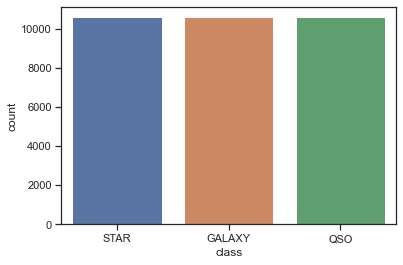

In [27]:
sns.countplot(x= 'class', data = df_resampling)
plt.show()

C:\Users\Administrator\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

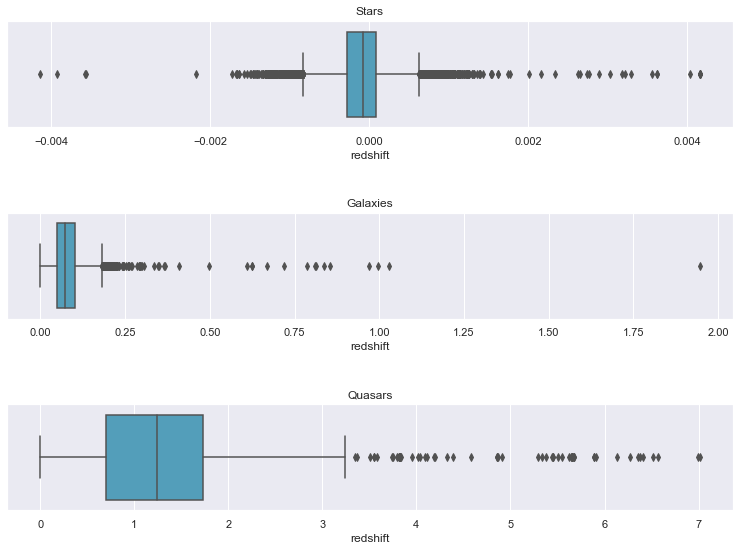

In [90]:
color_palette = 'GnBu_d'
sns.set(style='darkgrid')
fig, axs = plt.subplots(nrows=3)
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.subplots_adjust(hspace=0.8)
sns.boxplot(star['redshift'], palette=color_palette, ax=axs[0]).set_title('Stars')
sns.boxplot(galaxy['redshift'], palette=color_palette, ax=axs[1]).set_title('Galaxies')
sns.boxplot(qso['redshift'], palette=color_palette, ax=axs[2]).set_title('Quasars')
plt.show()

In [30]:
#  计算流量
def calc_flux(x):
    return -2.5*np.log(x)

In [31]:
aux = df_resampling['class']  # 取出'class'列
df_resampling.drop('class', axis=1, inplace=True)  # inplace=True,则原数组内容直接被改变。axis=1 在该列逐行删除
df_resampling['flux_u'] = calc_flux(df_resampling['u'])
df_resampling['flux_g'] = calc_flux(df_resampling['g'])
df_resampling['flux_r'] = calc_flux(df_resampling['r'])
df_resampling['flux_i'] = calc_flux(df_resampling['i'])
df_resampling['flux_z'] = calc_flux(df_resampling['z'])
df_resampling['class'] = aux

df_resampling = df_resampling.drop(['u','g', 'r', 'i', 'z'], axis =1) 

In [33]:
df_resampling.head()

,redshift,flux_u,flux_g,flux_r,flux_i,flux_z,class
70150,-0.000040,-7.329321,-7.152676,-7.084408,-7.058500,-7.049751,STAR
95211,0.000041,-7.087901,-6.906786,-6.855493,-6.839196,-6.836342,STAR
32426,-0.000063,-7.407386,-7.175758,-7.095701,-7.068274,-7.051163,STAR
42460,-0.000810,-7.432102,-7.308588,-7.267145,-7.249109,-7.245423,STAR
56223,0.000243,-7.075336,-6.823911,-6.734951,-6.707269,-6.697504,STAR


## 热度图 相关性

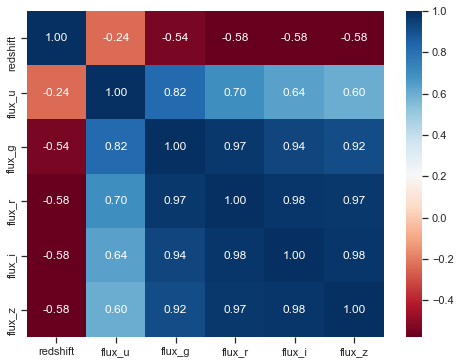

In [37]:
#Correlation
plt.figure(figsize=(8, 6))
df_corr = df_resampling.corr()  # DataFrame.corr() 计算列的成对相关性，不包括NA/null值。
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdBu')
plt.show()

##  sns.pairplot 两两之间的关系，线性、非线性、相关等等

[]

<Figure size 576x576 with 0 Axes>

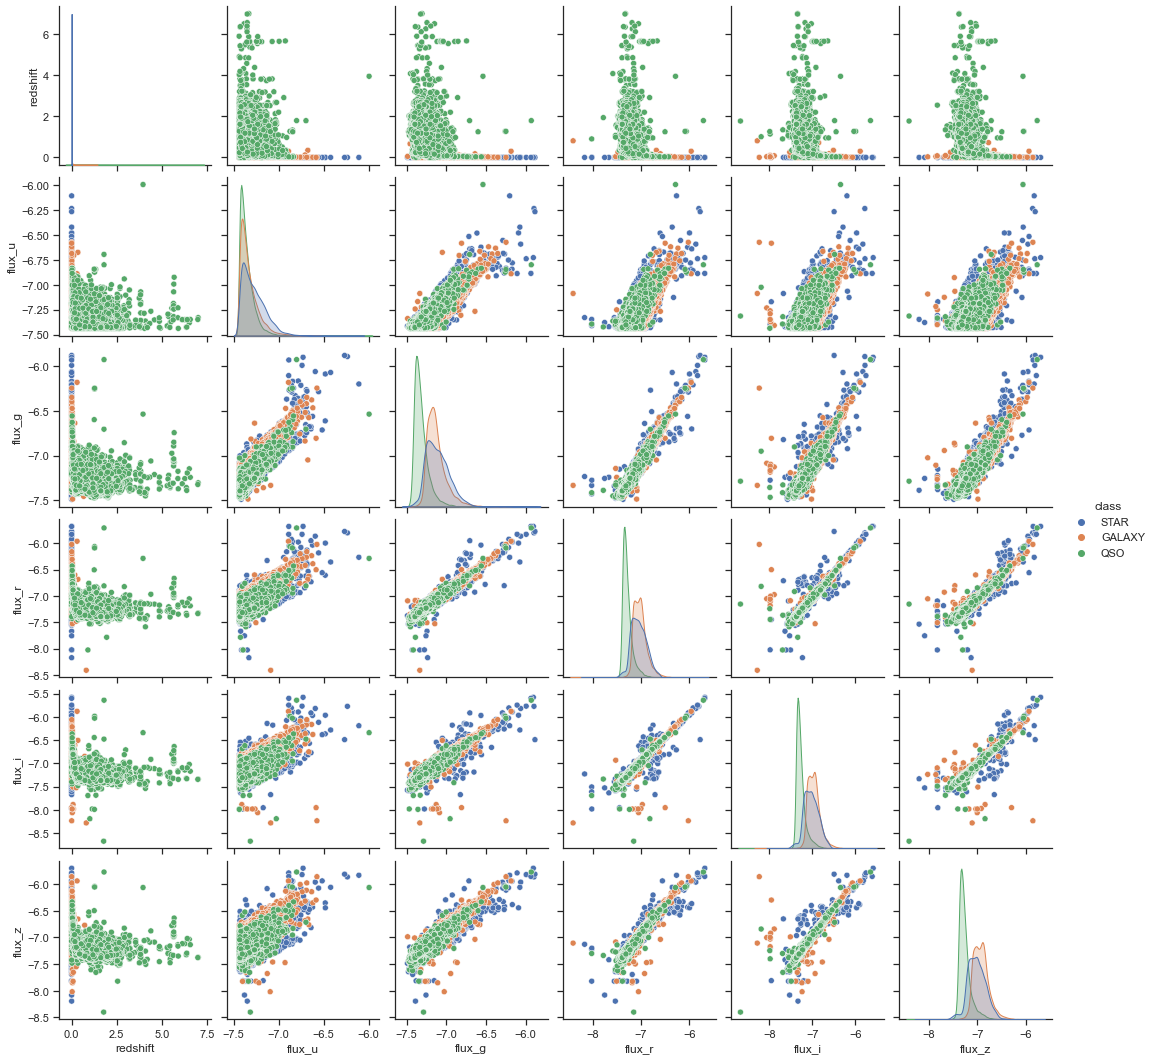

In [38]:
# Pairplot
plt.figure(figsize=(8, 8))
sns.pairplot(df_resampling, hue ="class")
plt.plot()

In [47]:
#Transform numpy array
X = df_resampling.iloc[:, :-1].to_numpy()  #  [:-1]等价于 [0:len(s)]，除了最后一个元素的切片  iloc → 基于行、列索引序号进行查询
y = df_resampling['class'].to_numpy()  # 标签（种类）此时y为一行多列
y = y.reshape(-1, 1)  # 此时y为一列多行

## 将类值编码为整数

One-Hot 编码

In [48]:
encoder = OneHotEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y).toarray()

In [49]:
encoded_Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## 划分训练集/测试集

klearn.model_selection 中调用train_test_split 函数，test_size：样本占比，如果是整数的话就是样本的数量

X_train,X_test, y_train, y_test =sklearn.model_selection.train_test_split(train_data, train_target, test_size=0.4, random_state=0, stratify=y_train)

https://www.cnblogs.com/Yanjy-OnlyOne/p/11288098.html

In [50]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, encoded_Y, test_size=0.33)

In [51]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.25)

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

## keras 搭建神经网络模型

BatchNormalization()  BN本身就是一个归一化网络层

在每一层输入的时候，再加个预处理操作，比如网络第三层输入数据X3(X3表示网络第三层的输入数据)把它归一化至：均值0、方差为1，然后再输入第三层计算，这样就可以解决“Internal Covariate Shift”的问题了。

https://blog.csdn.net/hjimce/article/details/50866313

近似白化预处理：E(xk)指的是每一批训练数据神经元xk的平均值；然后分母就是每一批数据神经元xk激活度的一个标准差了。

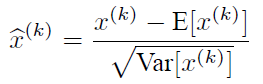

比如网络中间某一层学习到特征数据本身就分布在S型激活函数的两侧，强制把它归一化处理、标准差也限制在了1，把数据变换成分布于s函数的中间部分，这样就相当于我这一层网络所学习到的特征分布被搞坏了，这可怎么办？于是文献使出了一招惊天地泣鬼神的招式：变换重构，引入了可学习参数γ、β，这就是BN算法关键之处：
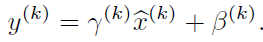

每一个神经元xk都会有一对这样的参数γ、β。这样其实当：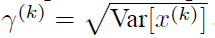

是可以恢复出原始的某一层所学到的特征的。因此我们引入了这个可学习重构参数γ、β，让我们的网络可以学习恢复出原始网络所要学习的特征分布。最后Batch Normalization网络层的前向传导过程公式就是：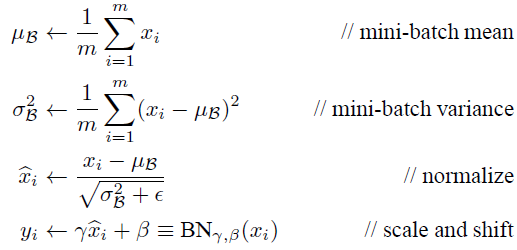

上面的公式中m指的是mini-batch size。

In [53]:
'''
    第一步：选择模型
'''
model = Sequential() # 选择模型  
'''
   第二步：构建网络层
'''
model.add(Dense(16, input_dim=6, activation='relu'))   # input_dim输入层 6,输出层 16   # 激活函数是relu
model.add(Dense(32, activation='relu'))  # 该隐藏层节点32个 
model.add(BatchNormalization())  # 采用BN算法后，你可以移除 过拟合中drop out、L2正则项参数，
model.add(Dense(32, activation='relu'))  # 该隐藏层节点32个 
model.add(Dense(16, activation='relu'))  # 该隐藏层节点16个 

model.add(Dense(3, activation='softmax'))  # 输出结果是3个类别，所以维度是3，最后一层用softmax作为激活函数

## 模型可视化

pip install pydot
pip install graphviz

from keras.utils import plot_model，执行plot_model需要graphviz的二进制文件

解决方法是在graphviz官网下载界面  http://www.graphviz.org/download/  选择自己操作系统对应的版本的.msi文件

安装时选择添加环境变量


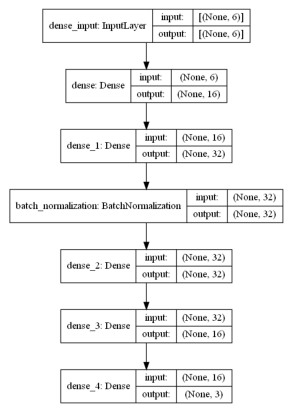

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import plot_model
#from tensorflow.python.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('model.png')
plt.figure(figsize=(5, 30))
plt.imshow(img)
plt.axis('off')
plt.show()

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                112       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 2,419
Trainable params: 2,355
Non-trainable params: 64
_____________________________________________________

## keras 调整学习率

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor=‘val_loss’, factor=0.5, patience=2, verbose=1)

monitor：监测的值，可以是accuracy，val_loss,val_accuracy

factor：缩放学习率的值，学习率将以lr = lr*factor的形式被减少

patience：当patience个epoch过去而模型性能不提升时，学习率减少的动作会被触发

verbose: 详细信息模式，0 或者 1 。

keras model.compile(loss='目标函数 ', optimizer='adam', metrics=['accuracy'])

In [59]:
'''
   第三步：编译
'''
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.00001)

# adam优化器 keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
'''
adam表现是最好的策略，但是上面的learning rate，如果用了normalization，设置大一些会比较好0.005,0.01什么的。
如果没有预训练应该再大一些，如果预训练那就小一些。
https://zhuanlan.zhihu.com/p/86261902?from_voters_page=true

'''
adam = Adam(lr=1e-3, epsilon = 1e-8, beta_1 = .9, beta_2 = .999)  # epsilon：float> = 0.模糊因子 该参数是非常小的数，为了防止在实现中除以零
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## 训练并记录

callbacks 回调函数是一组在训练的特定阶段被调用的函数集，你可以使用回调函数来观察训练过程中网络内部的状态和统计信息。通过传递回调函数列表到模型的.fit()中，即可在给定的训练阶段调用该函数集中的函数。

In [60]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64, callbacks= [reduce_lr])

Epoch 1/100
333/333 [==============================] - 1s 1ms/step - loss: 0.5643 - accuracy: 0.7356 - val_loss: 1.3171 - val_accuracy: 0.5132
Epoch 2/100
333/333 [==============================] - 0s 731us/step - loss: 0.2430 - accuracy: 0.9119 - val_loss: 0.6946 - val_accuracy: 0.7647
Epoch 3/100
333/333 [==============================] - 0s 727us/step - loss: 0.1717 - accuracy: 0.9452 - val_loss: 0.9724 - val_accuracy: 0.6915
Epoch 4/100
333/333 [==============================] - 0s 727us/step - loss: 0.1548 - accuracy: 0.9538 - val_loss: 0.6654 - val_accuracy: 0.6732
Epoch 5/100
333/333 [==============================] - 0s 724us/step - loss: 0.1488 - accuracy: 0.9552 - val_loss: 0.3063 - val_accuracy: 0.8647
Epoch 6/100
333/333 [==============================] - 0s 726us/step - loss: 0.1434 - accuracy: 0.9573 - val_loss: 0.2607 - val_accuracy: 0.9020
Epoch 7/100
333/333 [==============================] - 0s 723us/step - loss: 0.1332 - accuracy: 0.9584 - val_loss: 0.6923 - val_accu

## 评估模型

## 精确率和损失曲线

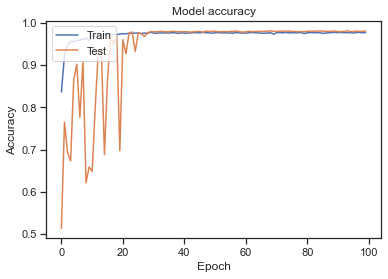

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

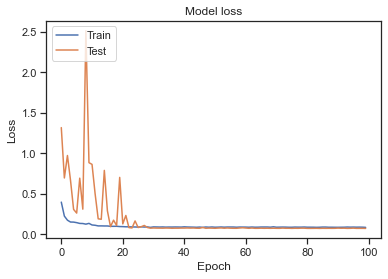

In [62]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## 学习率曲线

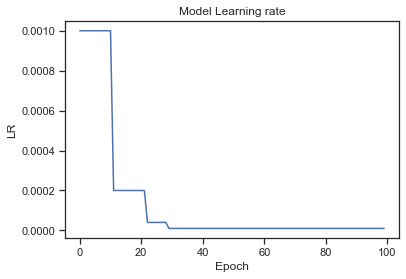

In [63]:
plt.plot(history.history['lr']) 
plt.title('Model Learning rate') 
plt.ylabel('LR') 
plt.xlabel('Epoch') 
plt.show()

## 测试模型

In [65]:
y_prob = model.predict(X_val) 
y_classes = y_prob.argmax(axis=-1)
y_class = []
for i in range(len(y_classes)):
    y_class.append(encoder.categories_[0][y_classes[i]])
y_class = np.array(y_class)
result = encoder.transform(y_class.reshape(-1, 1)).toarray()

<AxesSubplot:>

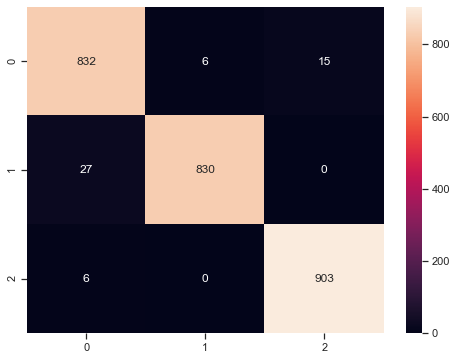

In [66]:
fig= plt.figure(figsize=(8,6))

# 从验证数据集中预测值
Y_pred = model.predict(X_val)
# 将预测类别转换为一个热向量
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# 将验证观察结果转换为一个热向量 
Y_true = np.argmax(y_val,axis = 1) 
# 混淆矩阵
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt="d")

In [67]:

precision = np.diag(confusion_mtx) / np.sum(confusion_mtx, axis = 0)
recall = np.diag(confusion_mtx) / np.sum(confusion_mtx, axis = 1)

print('Recall: ', precision)
print('Precision: ', recall)

Recall:  [0.96184971 0.99282297 0.98366013]
Precision:  [0.97538101 0.96849475 0.99339934]


In [68]:
Y_pred

array([[9.8980498e-01, 9.8283114e-03, 3.6678166e-04],
       [9.9145508e-01, 8.5249869e-03, 2.0013878e-05],
       [2.5140296e-04, 9.9974793e-01, 6.7531454e-07],
       ...,
       [7.9087662e-03, 3.1213753e-05, 9.9206007e-01],
       [9.8846519e-01, 1.0949119e-02, 5.8562332e-04],
       [2.5995507e-05, 9.9997401e-01, 4.0045478e-08]], dtype=float32)

In [70]:
Y_pred_classes

array([0, 0, 1, ..., 2, 0, 1], dtype=int64)

In [71]:
Y_true

array([0, 0, 1, ..., 2, 0, 1], dtype=int64)